In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel('./농넷_영주시_일별사과_등급조정.xlsx')

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(df['등급명'])
df['등급명'] = encoder.transform(df['등급명'])
df

,DATE,거래단위,평균가격(원),총거래물량(kg),총거래금액(원),시장명,법인명,품목명,품종명,산지명,산지시군명,등급명
0,2024-03-13,10.0,62366.666667,1800.0,11226000,서울가락도매,동화청과,사과,미시마,경상북도,영주시,3
1,2024-03-13,10.0,95000.000000,3840.0,36480000,서울가락도매,서울청과,사과,후지,경상북도,영주시,3
2,2024-03-13,10.0,60900.000000,1200.0,7308000,수원도매시장,경기청과,사과,미얀마,경북,영주시,3
3,2024-03-13,10.0,61300.000000,600.0,3678000,인천삼산도매,경인농산,사과,미시마,경상북도,영주시,3
4,2024-03-13,20.0,152875.568182,3520.0,26906100,안동도매시장,안동청과,사과,미얀마,경북,영주시,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65184,2020-01-03,10.0,24833.333333,2400.0,5960000,서울가락도매,농협가락(공),사과,미안마,경북,영주시,3
65185,2020-01-03,10.0,20000.000000,300.0,600000,서울가락도매,농협가락(공),사과,후지,경북,영주시,3
65186,2020-01-03,18.0,25200.000000,2700.0,3780000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3
65187,2020-01-03,18.0,25200.000000,1620.0,2268000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3


In [4]:
df_temp = df[['등급명', '총거래물량(kg)', '평균가격(원)', '총거래금액(원)', '거래단위']]
df_temp

,등급명,총거래물량(kg),평균가격(원),총거래금액(원),거래단위
0,3,1800.0,62366.666667,11226000,10.0
1,3,3840.0,95000.000000,36480000,10.0
2,3,1200.0,60900.000000,7308000,10.0
3,3,600.0,61300.000000,3678000,10.0
4,0,3520.0,152875.568182,26906100,20.0
...,...,...,...,...,...
65184,3,2400.0,24833.333333,5960000,10.0
65185,3,300.0,20000.000000,600000,10.0
65186,3,2700.0,25200.000000,3780000,18.0
65187,3,1620.0,25200.000000,2268000,18.0


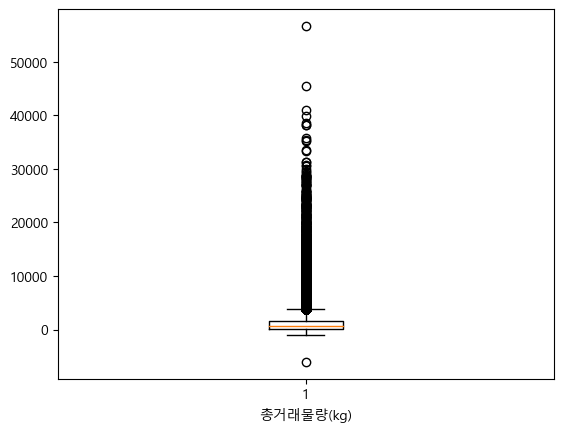

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib

matplotlib.rcParams['font.family'] = 'malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False  
plt.boxplot(df_temp['총거래물량(kg)'])
plt.xlabel('총거래물량(kg)')
plt.show()

In [16]:
def detect_outliers(df, columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)

    iqr = q3 - q1

    boundary = 1.5 * iqr

    index1 = df[df[columns] > q3 + boundary].index
    index2 = df[df[columns] < q1 - boundary].index

    df[columns] = df[columns].drop(index1)
    df[columns] = df[columns].drop(index2)

    return df

In [17]:
detect_outliers(df_temp, '총거래물량(kg)')

C:\Users\asiae\AppData\Local\Temp\ipykernel_3112\3772546017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index1)
C:\Users\asiae\AppData\Local\Temp\ipykernel_3112\3772546017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index2)


,등급명,총거래물량(kg),평균가격(원),총거래금액(원),거래단위
0,3,1800.0,62366.666667,11226000,10.0
1,3,NaN,95000.000000,36480000,10.0
2,3,1200.0,60900.000000,7308000,10.0
3,3,600.0,61300.000000,3678000,10.0
4,0,3520.0,152875.568182,26906100,20.0
...,...,...,...,...,...
65184,3,2400.0,24833.333333,5960000,10.0
65185,3,300.0,20000.000000,600000,10.0
65186,3,2700.0,25200.000000,3780000,18.0
65187,3,1620.0,25200.000000,2268000,18.0


In [18]:
df_temp.isnull().sum()

등급명             0
총거래물량(kg)    5409
평균가격(원)         0
총거래금액(원)        0
거래단위            0
dtype: int64

In [19]:
df_temp = df_temp.dropna()

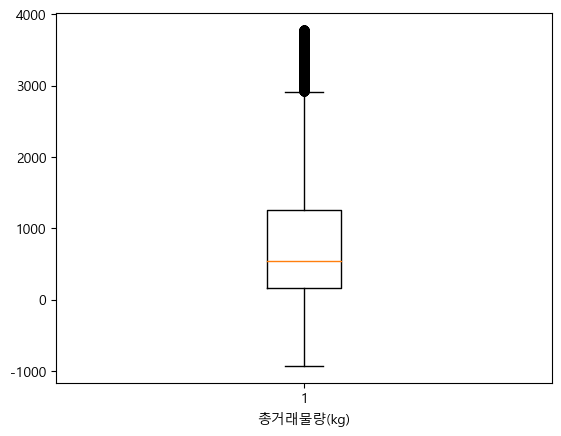

In [20]:
plt.boxplot(df_temp['총거래물량(kg)'])
plt.xlabel('총거래물량(kg)')
plt.show()

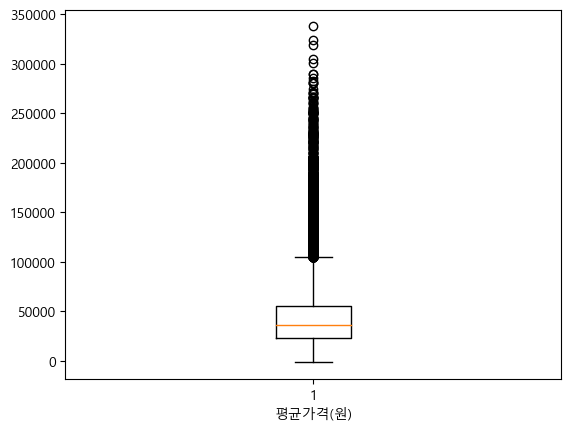

In [21]:
plt.boxplot(df_temp['평균가격(원)'])
plt.xlabel('평균가격(원)')
plt.show()

In [22]:
detect_outliers(df_temp, '평균가격(원)')

C:\Users\asiae\AppData\Local\Temp\ipykernel_3112\3772546017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index1)
C:\Users\asiae\AppData\Local\Temp\ipykernel_3112\3772546017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index2)


,등급명,총거래물량(kg),평균가격(원),총거래금액(원),거래단위
0,3,1800.0,62366.666667,11226000,10.0
2,3,1200.0,60900.000000,7308000,10.0
3,3,600.0,61300.000000,3678000,10.0
4,0,3520.0,NaN,26906100,20.0
5,0,3060.0,NaN,22732700,20.0
...,...,...,...,...,...
65184,3,2400.0,24833.333333,5960000,10.0
65185,3,300.0,20000.000000,600000,10.0
65186,3,2700.0,25200.000000,3780000,18.0
65187,3,1620.0,25200.000000,2268000,18.0


In [23]:
df_temp = df_temp.dropna()

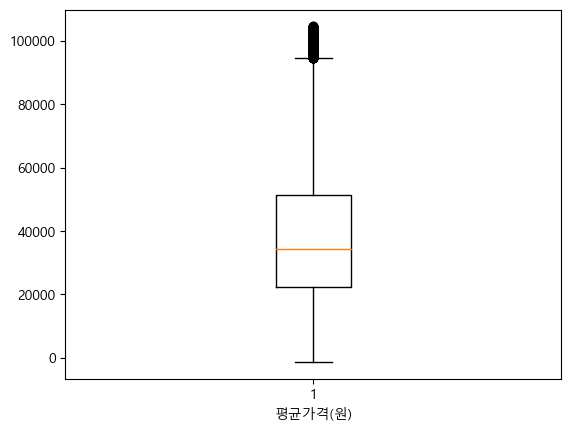

In [24]:
plt.boxplot(df_temp['평균가격(원)'])
plt.xlabel('평균가격(원)')
plt.show()

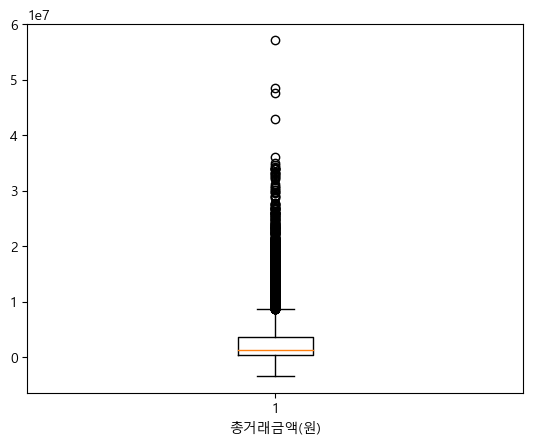

In [25]:
plt.boxplot(df_temp['총거래금액(원)'])
plt.xlabel('총거래금액(원)')
plt.show()

In [26]:
detect_outliers(df_temp, '총거래금액(원)')
df_temp = df_temp.dropna()

C:\Users\asiae\AppData\Local\Temp\ipykernel_3112\3772546017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index1)
C:\Users\asiae\AppData\Local\Temp\ipykernel_3112\3772546017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index2)


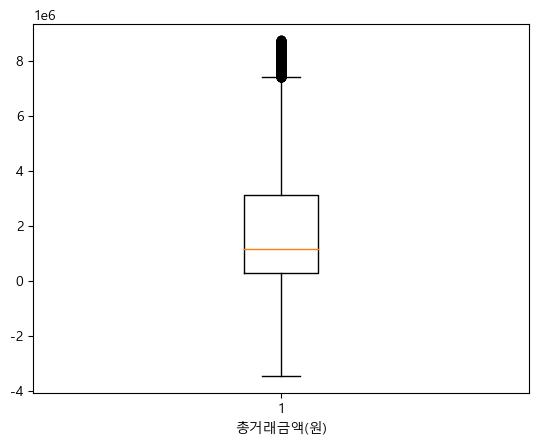

In [27]:
plt.boxplot(df_temp['총거래금액(원)'])
plt.xlabel('총거래금액(원)')
plt.show()